# CS 436 CS5310 - Computer Vision - Assignment 4

*__Submission Instructions:__*
- Rename this notebook to `PA4_rollnumber.ipynb` before submission on LMS.
- Code for all the tasks must be written in this notebook (you do not need to submit any other files).
- The output of all cells must be present in the version of the notebook you submit.
- The university honor code should be maintained. Any violation, if found, will result in disciplinary action. 

In [2]:
#Import all the required libraries

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from keras.models import load_model, Model
from keras.applications import vgg16
from keras.layers import Flatten, Dense


## Overview

In this assignment you will be exploring a few important concepts used in the deep learning projects:
- Training image classification algorithms using Deep Learning
- Dataset Analyses 
- Testing deep learning classifier with the test data
- Fine-tuning / Transfer Learning

We will be using a customized datasets, the links to download the data are provided to you. You will also be working with pretrained models, which could be downloaded from keras applications. You are **highly** encouraged to explore the images in dataset and model architectures in order to get the most out of this assignment. 

**_Dataset:_**
- D1- Test Data for evaluating the pretrained model (VGG-16) can be found in the folder "test-multiple_fruits" [here](https://drive.google.com/drive/folders/1ViePNUqS3LmPkaW6vJ1cRb4YGyIkWpqz?usp=sharing)
- D2- Data to be used for fine-tuning VGG-16 for 75 classes of fruits could be downloaded from the same link in the folder "fruits-trainValidate"


**_Pretrained Models:_** 
Can be found [here](https://keras.io/applications/#applications)


## Task 1: Data Preparation

Evaluate the performance of a pretrained network (VGG-16) for the test-multiple_fruits data downloaded by predicting labels of each image. You will:
- Download the VGG16 model and compile it with pretrained weights from imagenet.
- Obtain predictions for the test-multiple_fruits D1 dataset
- Print the predictions for all the test image from D1

In [3]:
model = vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
import os
path = "test-multiple_fruits/test-multiple_fruits"
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
allimages = os.listdir(path)
p_Allimages = []
for image in allimages:
    p_Allimages.append(path+'/'+image)

In [5]:
def pretrained_test(model,p_Allimages):
    labels=[]
    for i in range(len(p_Allimages)):
        image = load_img(p_Allimages[i], target_size=(224, 224))
        image = img_to_array(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        pred = model.predict(image)
        label = decode_predictions(pred)
        label = label[0][0]
        labels.append(label[1])
#         print('%s (%.2f%%)' % (label[1], label[2]*100))
    return labels
labels = pretrained_test(model,p_Allimages)
for i in range(len(p_Allimages)):
    print("predicted label = ", labels[i])



predicted label =  Granny_Smith
predicted label =  fig
predicted label =  tray
predicted label =  pomegranate
predicted label =  tray
predicted label =  pomegranate
predicted label =  butternut_squash
predicted label =  pomegranate
predicted label =  hip
predicted label =  barrow
predicted label =  buckeye
predicted label =  hip
predicted label =  guacamole
predicted label =  cucumber
predicted label =  teddy
predicted label =  strawberry
predicted label =  strawberry
predicted label =  bucket
predicted label =  abacus
predicted label =  hotdog
predicted label =  fig
predicted label =  honeycomb
predicted label =  lemon
predicted label =  grocery_store
predicted label =  Granny_Smith
predicted label =  custard_apple
predicted label =  Granny_Smith
predicted label =  pineapple
predicted label =  rotisserie
predicted label =  corn
predicted label =  pomegranate
predicted label =  orange
predicted label =  strawberry
predicted label =  hip
predicted label =  greenhouse
predicted label =  

## Batch Generator for Task 2
You could either use this batch image generator or could write your own batch generator if required for fine-tunning

In [3]:

INPUT_TRAINING_DIRECTORY  = "fruits-trainValidate/fruits-360/Training"
INPUT_VALIDATION_DIRECTORY = "fruits-trainValidate/fruits-360/Validation"
IMAGE_SIZE = (100,100)

In [4]:
# Image Augmentation
#Replace the input training/validation directories with the path to your training and validation splits
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(INPUT_TRAINING_DIRECTORY, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(INPUT_VALIDATION_DIRECTORY, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 37836 images belonging to 75 classes.
Found 12709 images belonging to 75 classes.


## Task 2: Transfer Learning

Next you will employ Transfer Learning and finetune the pretrained vgg-16 model you used in Task1 to better fit the fine-tune dataset D2 for 75 classes of fruits (details available in the readme file of dataset folder). You will:

- Change the number of nodes in the last FC layer according to the number of classes i.e. 5 
- Freeze everything except the FC layers and train it using the train split of D2 (using appropriate hyperparameters), validating the network for validation split of data.
- Train (Finetune) the dataset with training split and validate it using validation split
- Plot loss/accuracy vs epochs curves for your simulation

*You can use scikit-learn's `metrics.confusion_matrix` function. Consult the relevant documentation.* 


In [4]:

vgg_imagenet = vgg16.VGG16(include_top=False, weights='imagenet', input_shape = (100,100,3))
for layer in vgg_imagenet.layers:
    layer.freeze = True
    
vgg_imagenet.layers[-1].freeze = False
flatten = Flatten()(vgg_imagenet.layers[-1].output)
dense = Dense(75,activation='softmax')(flatten)
new_model = Model(vgg_imagenet.layers[0].input,dense)


# print summary and compile


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [8]:
new_model.compile(loss="categorical_crossentropy",optimizer = "Adam" ,metrics=["accuracy"])
 
history = new_model.fit_generator(generator = training_generator,
                        validation_data=validation_generator,
                        steps_per_epoch = 50,
                        nb_epoch=10,
                        validation_steps = 10
                       )
new_model.save_weights('weights.h5')


C:\Users\Moughees\AppData\Local\Continuum\anaconda3\envs\DIP_DEMO\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\Moughees\AppData\Local\Continuum\anaconda3\envs\DIP_DEMO\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=50, validation_steps=10, epochs=10)`
  import sys


Epoch 1/10
50/50 [==============================] - 1492s 30s/step - loss: 2.8704 - acc: 0.2465 - val_loss: 1.4264 - val_acc: 0.5515
Epoch 2/10
50/50 [==============================] - 1714s 34s/step - loss: 1.2902 - acc: 0.5851 - val_loss: 0.8396 - val_acc: 0.7455
Epoch 3/10
50/50 [==============================] - 1489s 30s/step - loss: 0.6648 - acc: 0.7761 - val_loss: 0.6019 - val_acc: 0.8110
Epoch 4/10
50/50 [==============================] - 1500s 30s/step - loss: 0.4236 - acc: 0.8555 - val_loss: 0.6421 - val_acc: 0.8355
Epoch 5/10
50/50 [==============================] - 1503s 30s/step - loss: 0.2733 - acc: 0.9069 - val_loss: 0.4048 - val_acc: 0.8968
Epoch 6/10
50/50 [==============================] - 1487s 30s/step - loss: 0.2240 - acc: 0.9232 - val_loss: 0.5230 - val_acc: 0.8530
Epoch 7/10
50/50 [==============================] - 1508s 30s/step - loss: 0.2318 - acc: 0.9214 - val_loss: 0.3174 - val_acc: 0.9100
Epoch 8/10
50/50 [==============================] - 1513s 30s/step - 

In [11]:
#Loss accuracy curves using matplot lib
new_model.save("model.h5")

In [29]:
print(history.history['loss'])
loss = history.history['acc']
epochs = [x for x in range(10)]
print(epochs)
plt.plot(epochs,loss)
plt.title('Accuracy')
plt.show()

NameError: name 'history' is not defined

## Task 3: Network Evaluation

Next you will test your finetuned model by plotting a confusion matrix between classes predicted. You will:

- Load the saved finetuned network
- Test your model for images in validation folder of D2
- Construct a multiclass confusion matrix (for any 10 classes) for actual and predicted class of each image and visualize the confmatrix as a heatmap

*You can use scikit-learn's `metrics.confusion_matrix` function. Consult the relevant documentation.* 

In [7]:
model = load_model('model.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [14]:
# model.evaluate_generator(validation_generator,steps = 50,verbose =1)

In [9]:
val_gen = validation_datagen.flow_from_directory(INPUT_VALIDATION_DIRECTORY,
                                                              target_size = IMAGE_SIZE, 
                                                              batch_size = 200,
                                                              class_mode = 'categorical')

Found 12709 images belonging to 75 classes.


In [12]:
print(val_gen.classes.shape)

(12709,)


In [13]:
predictions = model.predict_generator(val_gen,
                        steps = len(val_gen),
                        verbose =1)


64/64 [==============================] - 1855s 29s/step


In [31]:
# preds = model.predict_generator(validation_generator,
#                         steps = 50,
#                         verbose =1)


In [15]:
print(predictions.shape)
ypred = np.argmax(predictions, axis=1)
print(ypred.shape)

(12709, 75)
(12709,)


In [16]:
ytrue = val_gen.classes
# ytruee = ytrue[\/:9909]
print(ytrue.shape)


(12709,)


In [17]:
from sklearn.metrics import confusion_matrix



In [19]:
cm = confusion_matrix(ytrue,ypred)


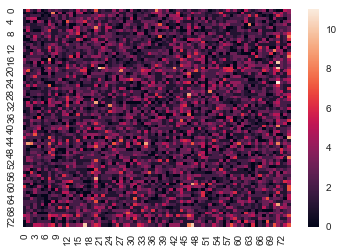

In [21]:
sns.heatmap(cm)


The accuracy is 91 percent

## Task 4: Prediction

Next you will test your finetuned model for test-multiple_fruits images and compare the result with the results of Task 1. You will:

- Predict labels for images in test-multiple_fruits D1 folder using finetuned network
- Compare your result qualitativly and quatitatively (by visualizing some of the comparing images with their respective labels)
- Analyse and discuss the improvement of results (if found any)


In [24]:
labels = (training_generator.class_indices)
maps = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]
print(maps)

{0: 'Apple Braeburn', 1: 'Apple Golden 1', 2: 'Apple Golden 2', 3: 'Apple Golden 3', 4: 'Apple Granny Smith', 5: 'Apple Red 1', 6: 'Apple Red 2', 7: 'Apple Red 3', 8: 'Apple Red Delicious', 9: 'Apple Red Yellow', 10: 'Apricot', 11: 'Avocado', 12: 'Avocado ripe', 13: 'Banana', 14: 'Banana Red', 15: 'Cactus fruit', 16: 'Cantaloupe 1', 17: 'Cantaloupe 2', 18: 'Carambula', 19: 'Cherry 1', 20: 'Cherry 2', 21: 'Cherry Rainier', 22: 'Cherry Wax Black', 23: 'Cherry Wax Red', 24: 'Cherry Wax Yellow', 25: 'Clementine', 26: 'Cocos', 27: 'Dates', 28: 'Granadilla', 29: 'Grape Pink', 30: 'Grape White', 31: 'Grape White 2', 32: 'Grapefruit Pink', 33: 'Grapefruit White', 34: 'Guava', 35: 'Huckleberry', 36: 'Kaki', 37: 'Kiwi', 38: 'Kumquats', 39: 'Lemon', 40: 'Lemon Meyer', 41: 'Limes', 42: 'Lychee', 43: 'Mandarine', 44: 'Mango', 45: 'Maracuja', 46: 'Melon Piel de Sapo', 47: 'Mulberry', 48: 'Nectarine', 49: 'Orange', 50: 'Papaya', 51: 'Passion Fruit', 52: 'Peach', 53: 'Peach Flat', 54: 'Pear', 55: 'Pea

In [28]:
def pretrained_test(model,p_Allimages):
    labels=[]
    for i in range(len(p_Allimages)):
        image = load_img(p_Allimages[i], target_size=(100, 100))
        image = img_to_array(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        pred = model.predict(image)
        label = np.argmax(pred)
#         label = label[0][0]
        labels.append(label)
#         print('%s (%.2f%%)' % (label[1], label[2]*100))
    return labels
labels = pretrained_test(model,p_Allimages)
for i in range(len(p_Allimages)):
    print("predicted label = ", maps[labels[i]])



predicted label =  Quince
predicted label =  Cherry 2
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Carambula
predicted label =  Banana
predicted label =  Pitahaya Red
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Cherry Rainier
predicted label =  Pitahaya Red
predicted label =  Granadilla
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Nectarine
predicted label =  Kaki
predicted label =  Banana Red
predicted label =  Kaki
predicted label =  Carambula
predicted label =  Carambula
predicted label =  Kaki
predicted label =  Carambula
predicted label =  Quince
predicted label =  Granadilla
predicted label =  Raspberry
predicted label =  Kaki
predicted label =  Kaki
predicted label =  Pitahaya Red
predicted label =  Carambula
predicted label =  Raspberry
predicted label =  Clementine
predicted label =  Nectarine

As seen, the predicted values have improved.
